In [1]:
from pandas import read_csv
import cv2 
import numpy as np
from tqdm import tqdm
from sklearn.model_selection  import train_test_split 

import os

prefix=os.path.abspath(os.path.dirname(os.getcwd()))+"/"

In [2]:
filename=prefix+"data/labels.csv"
labelsNames=["id","breed"]
labels=read_csv(filename,names=labelsNames)
print(labels.shape)

(12001, 2)


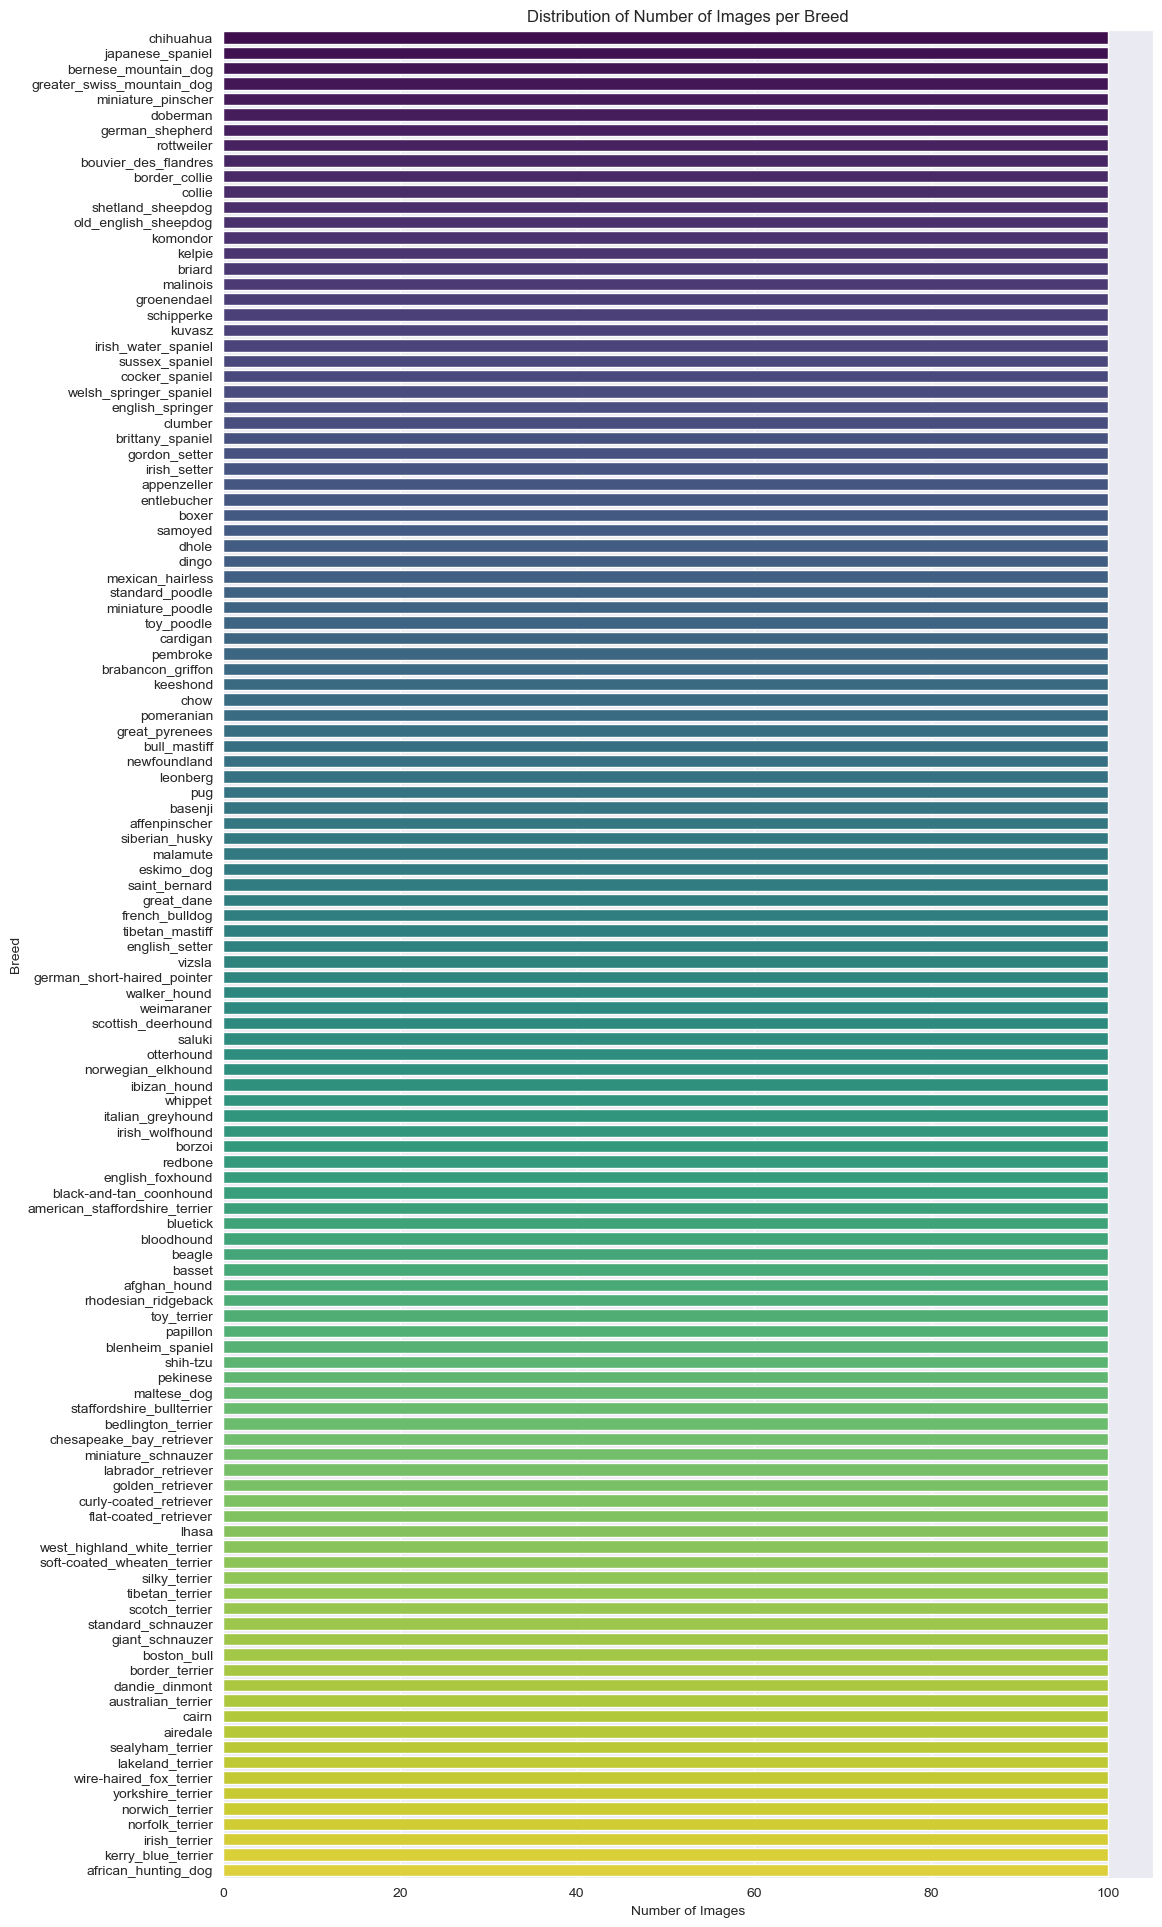

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the header if it exists in the data
if 'id' in labels.columns:
    labels = labels.iloc[1:]

# Count the number of images for each breed
breed_counts = labels['breed'].value_counts()

# Plot the distribution of the number of images per breed
plt.figure(figsize=(12, 24))
sns.barplot(y=breed_counts.index, x=breed_counts.values, palette="viridis")

# Adding labels and title
plt.xlabel('Number of Images')
plt.ylabel('Breed')
plt.title('Distribution of Number of Images per Breed')
plt.show()

In [4]:
label_list=labels["breed"].tolist()
label_list = label_list

In [5]:

def extractFeaturesFromImage(image_file):
        img = cv2.imread(image_file)
        img = cv2.resize(img, (400,400), interpolation=cv2.INTER_CUBIC)
        img = img.flatten()
        img = img / np.mean(img)
        return img


In [6]:
imagesIds=labels["id"].tolist()
imagesIds = imagesIds
feature_list = list()
for imageId in tqdm(imagesIds):
    feature_list.append(extractFeaturesFromImage(prefix+"data/train/"+imageId+".jpg"))
   
print(len(feature_list)) 

  8%|▊         | 920/12000 [00:06<01:14, 147.96it/s]


KeyboardInterrupt: 

In [7]:
print(len(feature_list[0]))

480000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, label_list, test_size=0.2, random_state=12)

ValueError: Found input variables with inconsistent numbers of samples: [920, 12000]

In [9]:
from sklearn import svm

In [10]:
clf = svm.SVC(gamma=0.01, C=1 ,verbose=1,max_iter=1000)
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [11]:
Ypred = clf.predict(X_test);

print("pre",Ypred)
print("test",y_test)

NameError: name 'X_test' is not defined